# Gaussian Mixture Models and the EM Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal

## 1-D Case

In [2]:
pi_true = np.array([0.3, 0.5, 0.2])
mu_true = np.array([-3, 0, 5])
sigma_true = np.array([3, 1, 4])

In [3]:
# Generate data
num_obs = 500

class0 = np.random.normal(mu_true[0], np.sqrt(sigma_true[0]), int(pi_true[0]*num_obs))
class1 = np.random.normal(mu_true[1], np.sqrt(sigma_true[1]), int(pi_true[1]*num_obs))
class2 = np.random.normal(mu_true[2], np.sqrt(sigma_true[2]), int(pi_true[2]*num_obs))

X = np.concatenate([class0, class1, class2])
t = np.concatenate([np.repeat(0, int(pi_true[0]*num_obs)),
                    np.repeat(1, int(pi_true[1]*num_obs)),
                    np.repeat(2, int(pi_true[2]*num_obs))])

In [4]:
# EM algorithm. Plot as we learn.

## Initialization
mu = np.array([-10, 2, 8])
sigma = np.array([5, 3, 6])
pi = np.ones(3)/3

gamma = np.zeros([num_obs, 3])    # Responsibilities

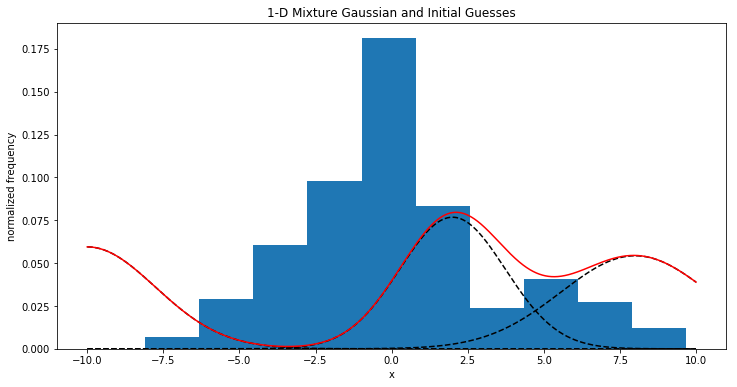

In [5]:
fig, ax = plt.subplots(figsize=[12, 6])
x_axis = np.arange(-10, 10, 0.001)

ax.hist(X, normed=True)
ax.plot(x_axis, pi[0]*norm.pdf(x_axis, mu[0], np.sqrt(sigma[0])), color='k', linestyle='--')
ax.plot(x_axis, pi[1]*norm.pdf(x_axis, mu[1], np.sqrt(sigma[1])), color='k', linestyle='--')
ax.plot(x_axis, pi[2]*norm.pdf(x_axis, mu[2], np.sqrt(sigma[2])), color='k', linestyle='--')

ax.plot(x_axis,
         pi[0]*norm.pdf(x_axis, mu[0], np.sqrt(sigma[0]))
         + pi[1]*norm.pdf(x_axis, mu[1], np.sqrt(sigma[1]))
         + pi[2]*norm.pdf(x_axis, mu[2], np.sqrt(sigma[2])),
         color='r')

ax.set(title='1-D Mixture Gaussian and Initial Guesses', xlabel='x', ylabel='normalized frequency')
plt.show()

In [6]:
muplot = []
sigmaplot = []
piplot = []

for i in range(50):
    ## Expectation step
    denom =   pi[0]*norm(mu[0], np.sqrt(sigma[0])).pdf(X) \
            + pi[1]*norm(mu[1], np.sqrt(sigma[1])).pdf(X) \
            + pi[2]*norm(mu[2], np.sqrt(sigma[2])).pdf(X)

    gamma[:, 0] = (pi[0]*norm(mu[0], np.sqrt(sigma[0])).pdf(X)) / denom
    gamma[:, 1] = (pi[1]*norm(mu[1], np.sqrt(sigma[1])).pdf(X)) / denom
    gamma[:, 2] = (pi[2]*norm(mu[2], np.sqrt(sigma[2])).pdf(X)) / denom

    ## Maximization step
    N = gamma.sum(axis=0)
    mu = (gamma * np.repeat(X, 3).reshape([num_obs, 3])).sum(axis=0) / N
    sigma = (gamma * ((np.repeat(X, 3).reshape([num_obs, 3]) - mu)**2)).sum(axis=0) / N
    pi = N / num_obs
    
    ## Remember stuff for plotting
    if i == 0:
        muplot.append(mu)
        sigmaplot.append(sigma)
        piplot.append(pi)
    elif i == 1:
        muplot.append(mu)
        sigmaplot.append(sigma)
        piplot.append(pi)
    elif i == 4:
        muplot.append(mu)
        sigmaplot.append(sigma)
        piplot.append(pi)
    elif i == 49:
        muplot.append(mu)
        sigmaplot.append(sigma)
        piplot.append(pi)

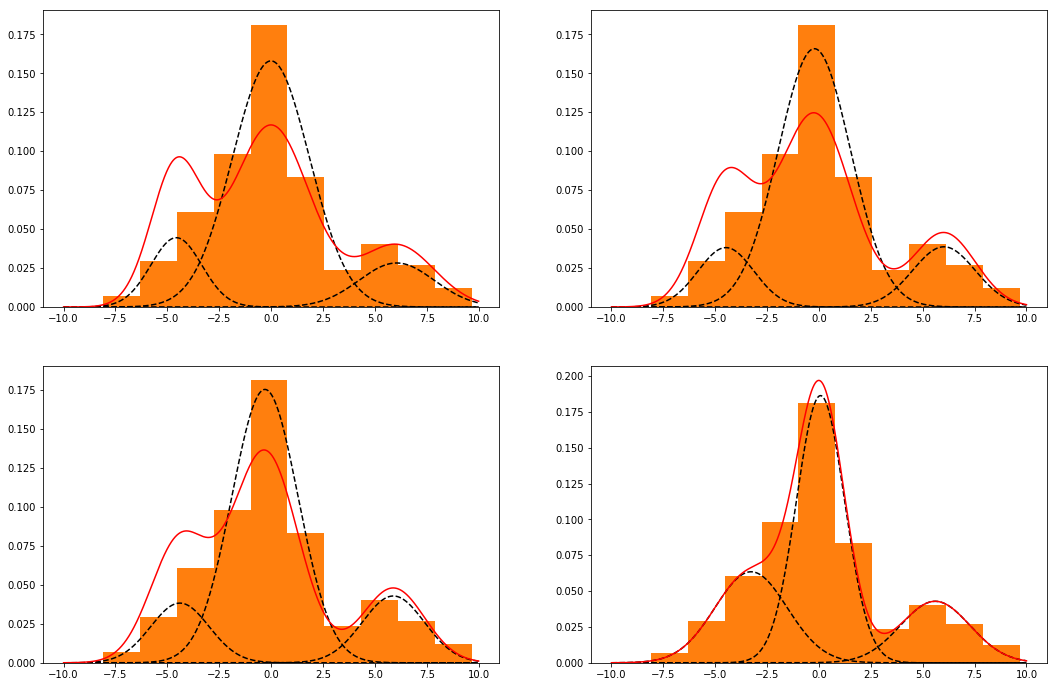

In [7]:
# Plot as we learn.
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=[18, 12])
x_axis = np.arange(-10, 10, 0.001)

for ax in axarr.reshape(-1):
    ax.hist(X, normed=True)

for ax, m, s, p in zip(axarr.reshape(-1), muplot, sigmaplot, piplot):
    ax.hist(X, normed=True)
    ax.plot(x_axis, p[0]*norm.pdf(x_axis, m[0], np.sqrt(s[0])), color='k', linestyle='--')
    ax.plot(x_axis, p[1]*norm.pdf(x_axis, m[1], np.sqrt(s[1])), color='k', linestyle='--')
    ax.plot(x_axis, p[2]*norm.pdf(x_axis, m[2], np.sqrt(s[2])), color='k', linestyle='--')
    ax.plot(x_axis,
             pi[0]*norm.pdf(x_axis, m[0], np.sqrt(s[0]))
             + pi[1]*norm.pdf(x_axis, m[1], np.sqrt(s[1]))
             + pi[2]*norm.pdf(x_axis, m[2], np.sqrt(s[2])),
             color='r')

plt.show()

## 2-D Case:

In [8]:
pi_true = [0.3, 0.5, 0.2]

mu_true = [np.array([-5, -2]),
           np.array([2, 0]),
           np.array([-5, 5])]

sigma_true = [np.identity(2),
              np.array([[5, 2], [2, 4]]),
              np.array([[7, 1], [1, 9]])]

In [9]:
# Generate data
num_obs = 500

class0 = np.random.multivariate_normal(mu_true[0], np.sqrt(sigma_true[0]), int(pi_true[0]*num_obs))
class1 = np.random.multivariate_normal(mu_true[1], np.sqrt(sigma_true[1]), int(pi_true[1]*num_obs))
class2 = np.random.multivariate_normal(mu_true[2], np.sqrt(sigma_true[2]), int(pi_true[2]*num_obs))

X = np.concatenate([class0, class1, class2])
t = np.concatenate([np.repeat(0, int(pi_true[0]*num_obs)),
                    np.repeat(1, int(pi_true[1]*num_obs)),
                    np.repeat(2, int(pi_true[2]*num_obs))])

In [10]:
# EM algorithm

## Initialization
mu = [np.array([-4, 6]),
      np.array([7, -2]),
      np.array([0, -5])]

sigma = [np.identity(2),
         np.identity(2),
         np.identity(2)]

pi = [1/3, 1/3, 1/3]

N = [0, 0, 0]

gamma = [np.empty(1),
         np.empty(1), 
         np.empty(1)]

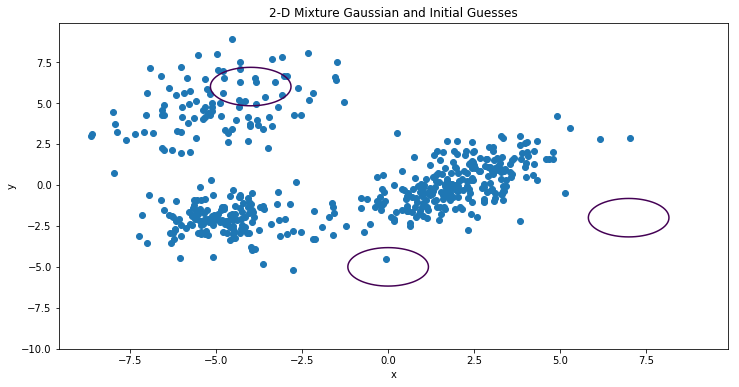

In [11]:
fig, ax = plt.subplots(figsize=[12, 6])
ax.scatter(X[:, 0], X[:, 1])
ax.legend()
ax.set(title='2-D Mixture Gaussian and Initial Guesses', xlabel='x', ylabel='y')

XX, YY = np.mgrid[-7:10:0.1, -10:10:0.1]
pos = np.empty(XX.shape + (2,))
pos[:, :, 0] = XX
pos[:, :, 1] = YY

ax.contour(XX, YY, multivariate_normal(mu[0], sigma[0]).pdf(pos), 1)
ax.contour(XX, YY, multivariate_normal(mu[1], sigma[1]).pdf(pos), 1)
ax.contour(XX, YY, multivariate_normal(mu[2], sigma[2]).pdf(pos), 1)

plt.show()

In [12]:
muplot = []
sigmaplot = []
piplot = []

for i in range(50):
    ## Expectation step
    denom =   pi[0]*multivariate_normal(mu[0], np.sqrt(sigma[0])).pdf(X) \
            + pi[1]*multivariate_normal(mu[1], np.sqrt(sigma[1])).pdf(X) \
            + pi[2]*multivariate_normal(mu[2], np.sqrt(sigma[2])).pdf(X)

    gamma[0] = (pi[0]*multivariate_normal(mu[0], np.sqrt(sigma[0])).pdf(X)) / denom
    gamma[1] = (pi[1]*multivariate_normal(mu[1], np.sqrt(sigma[1])).pdf(X)) / denom
    gamma[2] = (pi[2]*multivariate_normal(mu[2], np.sqrt(sigma[2])).pdf(X)) / denom

    ## Maximization step
    N[0] = gamma[0].sum()
    N[1] = gamma[1].sum()
    N[2] = gamma[2].sum()
    mu[0] = np.dot(gamma[0], X)/N[0]
    mu[1] = np.dot(gamma[1], X)/N[1]
    mu[2] = np.dot(gamma[2], X)/N[2]
    for j in range(3):
        avg = np.zeros([2, 2])
        for gam, row in zip(gamma[j], (X - mu[j])):
            v = row.reshape(2, 1)
            avg += gam * (v @ v.T)
        avg /= N[j]
        sigma[j] = avg
    pi[0] = N[0] / num_obs
    pi[1] = N[1] / num_obs
    pi[2] = N[2] / num_obs

    ## Remember stuff for plotting
    if i == 0:
        muplot.append(mu)
        sigmaplot.append(sigma)
        piplot.append(pi)
    elif i == 1:
        muplot.append(mu)
        sigmaplot.append(sigma)
        piplot.append(pi)
    elif i == 4:
        muplot.append(mu)
        sigmaplot.append(sigma)
        piplot.append(pi)
    elif i == 49:
        muplot.append(mu)
        sigmaplot.append(sigma)
        piplot.append(pi)

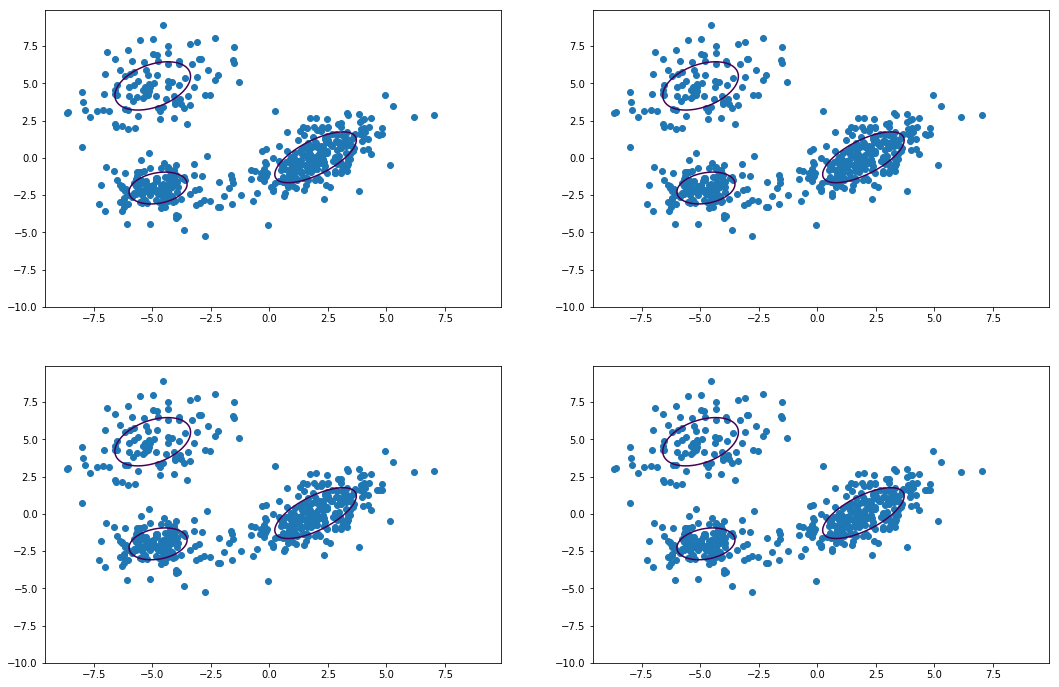

In [13]:
# Plot as we learn.
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=[18, 12])
XX, YY = np.mgrid[-7:10:0.1, -10:10:0.1]
pos = np.empty(XX.shape + (2,))
pos[:, :, 0] = XX
pos[:, :, 1] = YY

for ax, m, s, p in zip(axarr.reshape(-1), muplot, sigmaplot, piplot):
    ax.scatter(X[:, 0], X[:, 1])
    ax.contour(XX, YY, multivariate_normal(mu[0], sigma[0]).pdf(pos), 1)
    ax.contour(XX, YY, multivariate_normal(mu[1], sigma[1]).pdf(pos), 1)
    ax.contour(XX, YY, multivariate_normal(mu[2], sigma[2]).pdf(pos), 1)

plt.show()